fefe labeled

In [ ]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from collections import defaultdict
 
import matplotlib.pyplot as plt
 
import sklearn
from sklearn.model_selection import train_test_split
 
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import models
from tensorflow.keras import callbacks
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Activation, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")
DATA_PATH: str = "/content/gdrive/My Drive/skripsi/preprocessed_newerer/"
DATA_TUNER: str = "/content/gdrive/My Drive/skripsi/tuner/"
DATA_WEIGHT: str = "/content/gdrive/My Drive/skripsi/weight/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
datatrain = pd.read_csv(f'{DATA_PATH}data_train9010.csv')
dataval = pd.read_csv(f'{DATA_PATH}data_val9010.csv')
datatest = pd.read_csv(f'{DATA_PATH}data_test9010.csv')

data_train = datatrain['tweets']
data_val = dataval['tweets']
data_test = datatest['tweets']

y_train = datatrain['label']
y_val = dataval['label']
y_test = datatest['label']

In [ ]:
data_train.head()

0    presiden joko widodo jokowi tinjau vaksinasi m...
1    ini jelas untuk anda yang sudah di vaksin tapi...
2    masalah benar bukan pada vaksinasi lain bagaim...
3                ayo vaksin dan terap prokes dengan 5m
4       astrazeneca masalah tetap pakai oleh australia
Name: tweets, dtype: object

In [ ]:
print(datatrain['label'].value_counts())

4    678
3    639
2    310
1    294
0    230
Name: label, dtype: int64


In [ ]:
data_val.head()

0    vaksin bukan hanya untuk penting pribadi lain ...
1                  vaksinasi bisa cegah virus covid 19
2    india terlalu cepat puas diri vaksinasi massal...
3    pakar farmasi kini kembang vaksin covid 19 gen...
4    tim kembang vaksin covid 19 nusantara minta un...
Name: tweets, dtype: object

In [ ]:
print(dataval['label'].value_counts())

4    138
3    124
2     63
1     59
0     46
Name: label, dtype: int64


In [ ]:
data_test.head()

0                        vaksinasi massal layan publik
1                                   bpom terbit vaksin
2    daftar lansia di sekitar untuk segera vaksin c...
3    mufti dari al azhar mesir dan saudi kompak nya...
4                                      apa erti vaksin
Name: tweets, dtype: object

In [ ]:
print(datatest['label'].value_counts())

4    91
3    77
1    49
0    36
2    34
Name: label, dtype: int64


# Defining Parameters

In [ ]:
x = datatrain["tweets"].str.split("\\s+")

In [ ]:
sentences = [row.split() for row in datatrain['tweets']]
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1

In [ ]:
vocab_size = len(word_freq)
print(vocab_size)

3057


In [ ]:
max_length = x.str.len().max()
max_length

48

In [ ]:
embedding_dim = 400

In [ ]:
print(data_train)

0       presiden joko widodo jokowi tinjau vaksinasi m...
1       ini jelas untuk anda yang sudah di vaksin tapi...
2       masalah benar bukan pada vaksinasi lain bagaim...
3                   ayo vaksin dan terap prokes dengan 5m
4          astrazeneca masalah tetap pakai oleh australia
                              ...                        
2146    vaksinasi covid 19 dosis 1 untuk nakes lansia ...
2147                        mama juga tidak berani vaksin
2148    sementara untuk lansia terima vaksin dosis per...
2149    orang guru di jombang berontak tidak mau sunti...
2150    perintah terus upaya untuk kembang dan laku ad...
Name: tweets, Length: 2151, dtype: object


# To Vector

In [ ]:
import gensim
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import KeyedVectors
import numpy as np

model = KeyedVectors.load_word2vec_format('/content/gdrive/MyDrive/skripsi/preprocessed/after_stemmed/Word2Vec_400dim.txt')

embeddings_index={}
for word in model.wv.vocab.keys():
    embeddings_index[word]=model.wv[word]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
tokenizer = Tokenizer(num_words = vocab_size)
def encode(text):
    return tokenizer.texts_to_sequences(text)

In [ ]:
tokenizer.fit_on_texts(data_train)

train_sequences = encode(data_train)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')

test_sequences = encode(data_test)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')

val_sequences = encode(data_val)
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding='post')

In [ ]:
word_index = tokenizer.word_index
num_words = vocab_size+1
embedding_matrix = np.zeros((num_words, 400))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
x_train = train_padded
x_val = val_padded
x_test = test_padded

In [ ]:
x_train1 = np.concatenate((x_train,x_val))
print(x_train1)

[[166 558 623 ...   0   0   0]
 [ 13 142   8 ...   0   0   0]
 [258 143  99 ...   0   0   0]
 ...
 [  1  17   8 ...   0   0   0]
 [780 780  27 ...   0   0   0]
 [  2 743   8 ...   0   0   0]]


In [ ]:
x_train1.shape

(2581, 48)

# Labels to Categorical

In [ ]:
y_train = to_categorical(datatrain['label'])
y_val = to_categorical(dataval['label'])
y_test = to_categorical(datatest['label'])
print(y_train)

[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [ ]:
y_train1 = np.concatenate((y_train,y_val))
print(y_train1)

[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [ ]:
y_train1.shape

(2581, 5)

In [ ]:
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((2151, 48), (430, 48), (287, 48), (2151, 5), (430, 5), (287, 5))

# CNN

In [ ]:
def model_evaluation(x, y, model):
    loss, accuracy = model.evaluate(x, y, verbose=False)
    return loss, accuracy

In [ ]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def W2V_CNN(hp):
    model = Sequential()
    model.add(Embedding(num_words, embedding_dim, weights = [embedding_matrix], input_length = max_length, trainable = False) )
    
    model.add(Conv1D(filters=hp.Choice('conv_filters', values=[32, 64, 128,256]), 
                   kernel_size=hp.Choice('kernel_size', values=[2,3,4]), 
                   activation='relu'))
    model.add(MaxPooling1D(pool_size=hp.Choice('pool_size', values=[2,3,4])))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(units=hp.Choice('dense_units', values = [32, 64, 128,256]), 
                  activation='relu'))
    model.add(Dense(5, activation='softmax')) 

    adam = tf.optimizers.Adam(hp.Choice('learning_rate',
                                        values=[1e-3, 1e-4, 5e-5, 1e-5]))
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', 
                  metrics=['accuracy'])          
    
    return model

In [ ]:
from kerastuner.tuners import Hyperband
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow.keras import regularizers

In [ ]:
tuner = Hyperband(
    W2V_CNN,
    max_epochs=100,
    objective='val_accuracy',
    directory=DATA_TUNER,
    project_name='newerer9010_cnn_w2v_001'
)

In [ ]:
tuner.search(x_train, y_train, epochs=100, validation_data=(x_val, y_val))

Trial 254 Complete [00h 00m 32s]
val_accuracy: 0.5976744294166565

Best val_accuracy So Far: 0.6232557892799377
Total elapsed time: 00h 25m 02s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'conv_filters': 128,
 'dense_units': 256,
 'kernel_size': 3,
 'learning_rate': 0.001,
 'pool_size': 4,
 'tuner/bracket': 4,
 'tuner/epochs': 100,
 'tuner/initial_epoch': 34,
 'tuner/round': 4,
 'tuner/trial_id': '0142'}

In [ ]:
tuner.results_summary()

Results summary
Results in /content/gdrive/My Drive/skripsi/tuner/newerer9010_cnn_w2v_001
Showing 10 best trials
Trial summary
Hyperparameters:
conv_filters: 128
kernel_size: 3
pool_size: 4
dense_units: 256
learning_rate: 0.001
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0142
Score: 0.6232557892799377
Trial summary
Hyperparameters:
conv_filters: 128
kernel_size: 4
pool_size: 4
dense_units: 256
learning_rate: 0.001
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0143
Score: 0.6162790656089783
Trial summary
Hyperparameters:
conv_filters: 256
kernel_size: 4
pool_size: 4
dense_units: 64
learning_rate: 0.001
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0206
Score: 0.6162790656089783
Trial summary
Hyperparameters:
conv_filters: 128
kernel_size: 4
pool_size: 4
dense_units: 256
learning_rate: 0.001
tuner/epochs: 34
tuner/initial_epoch: 12
tuner/bracket: 4
tuner/r

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model_cnn = W2V_CNN(best_hps)
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 48, 400)           1223200   
                                                                 
 conv1d_1 (Conv1D)           (None, 46, 128)           153728    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 11, 128)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1408)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1408)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               360704    
                                                      

Visualization

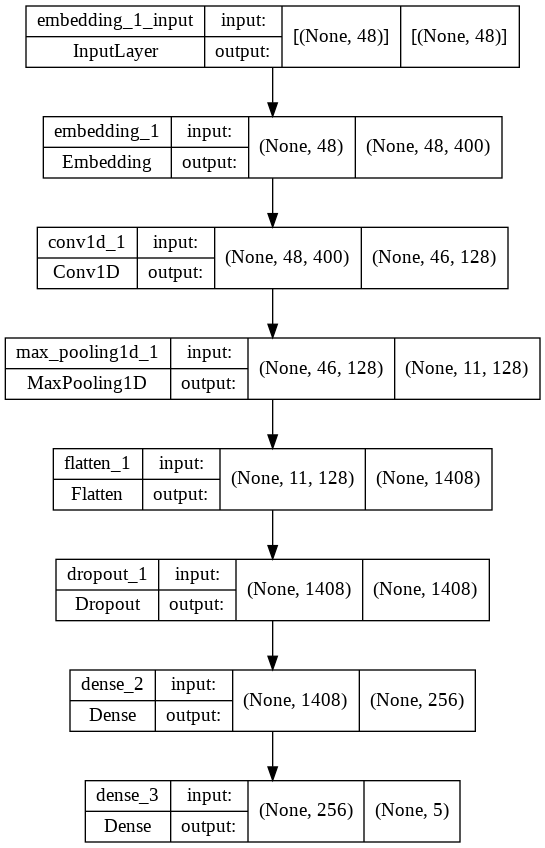

In [ ]:
plot_model(model_cnn, to_file='visualize_model.png', show_shapes=True, show_layer_names=True)

Model Training

In [ ]:
es_callbacks = [EarlyStopping(monitor="val_loss", min_delta=0.001, patience=5)]

history = model_cnn.fit(x_train,
          y_train,
          epochs=100,
          validation_data=(x_val, y_val),
          callbacks=[es_callbacks])

Epoch 1/100
68/68 [==============================] - 1s 8ms/step - loss: 1.4665 - accuracy: 0.3938 - val_loss: 1.2227 - val_accuracy: 0.4721
Epoch 2/100
68/68 [==============================] - 0s 5ms/step - loss: 1.0820 - accuracy: 0.5500 - val_loss: 1.1471 - val_accuracy: 0.5349
Epoch 3/100
68/68 [==============================] - 0s 5ms/step - loss: 0.9178 - accuracy: 0.6420 - val_loss: 1.1858 - val_accuracy: 0.5628
Epoch 4/100
68/68 [==============================] - 0s 5ms/step - loss: 0.7564 - accuracy: 0.6974 - val_loss: 1.1453 - val_accuracy: 0.5535
Epoch 5/100
68/68 [==============================] - 0s 6ms/step - loss: 0.6735 - accuracy: 0.7536 - val_loss: 1.1715 - val_accuracy: 0.5814
Epoch 6/100
68/68 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7885 - val_loss: 1.2039 - val_accuracy: 0.5674
Epoch 7/100
68/68 [==============================] - 0s 5ms/step - loss: 0.4689 - accuracy: 0.8224 - val_loss: 1.2978 - val_accuracy: 0.5512
Epoch 8/100
6

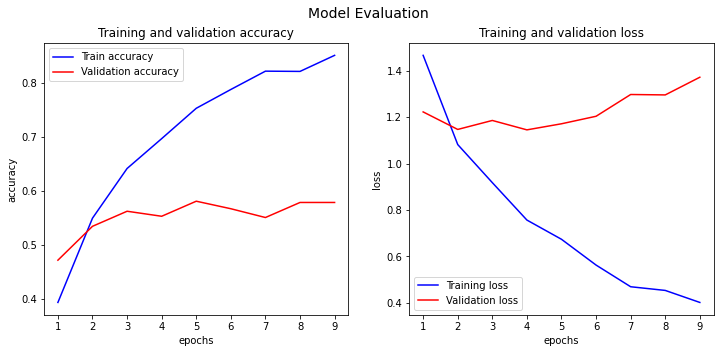

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, accuracy, 'b', label='Train accuracy')
plt.plot(x, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.suptitle('Model Evaluation', fontsize=14)
plt.savefig('cnn_graph_val.png')

In [ ]:
es_callbacks = [EarlyStopping(monitor="val_loss", min_delta=0.001, patience=5)]

history = model_cnn.fit(x_train1,
          y_train1,
          epochs=100,
          validation_data=(x_test, y_test),
          callbacks=[es_callbacks])

Epoch 1/100
81/81 [==============================] - 1s 11ms/step - loss: 0.5890 - accuracy: 0.7908 - val_loss: 1.1459 - val_accuracy: 0.6063
Epoch 2/100
81/81 [==============================] - 1s 7ms/step - loss: 0.4618 - accuracy: 0.8338 - val_loss: 1.1758 - val_accuracy: 0.5923
Epoch 3/100
81/81 [==============================] - 1s 7ms/step - loss: 0.3924 - accuracy: 0.8559 - val_loss: 1.2166 - val_accuracy: 0.5923
Epoch 4/100
81/81 [==============================] - 1s 7ms/step - loss: 0.3498 - accuracy: 0.8718 - val_loss: 1.2265 - val_accuracy: 0.6237
Epoch 5/100
81/81 [==============================] - 1s 6ms/step - loss: 0.3149 - accuracy: 0.8900 - val_loss: 1.2912 - val_accuracy: 0.5714
Epoch 6/100
81/81 [==============================] - 1s 7ms/step - loss: 0.2960 - accuracy: 0.8904 - val_loss: 1.3684 - val_accuracy: 0.5958


In [ ]:
model_cnn.save(f'{DATA_WEIGHT}newerer9010_model_cnn_w2v_001.h5')

Accuracy and Loss Plot

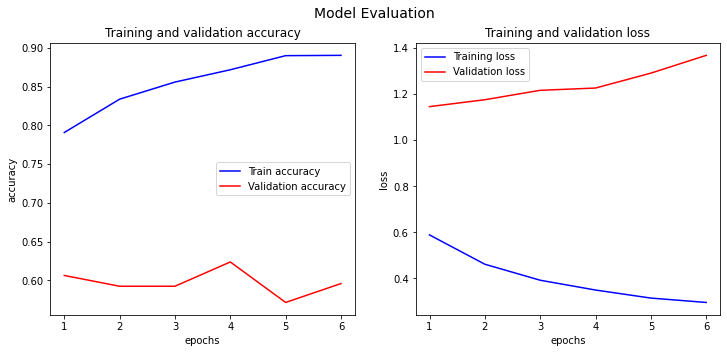

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, accuracy, 'b', label='Train accuracy')
plt.plot(x, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.suptitle('Model Evaluation', fontsize=14)
plt.savefig('cnn_graph.png')

In [ ]:
loss_train_best, accuracy_train_best = model_evaluation(x_train1, y_train1, model_cnn)
loss_test_best, accuracy_test_best = model_evaluation(x_test, y_test, model_cnn)

In [ ]:
print('Train [{}][{}]'.format(accuracy_train_best, loss_train_best))
print('Test [{}][{}]'.format(accuracy_test_best, loss_test_best))

Train [0.9771406650543213][0.09649264812469482]
Test [0.595818817615509][1.3683565855026245]


In [ ]:
result_classes = np.argmax(model_cnn.predict(x_test), axis=-1)

# Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
(unique, counts) = np.unique(result_classes, return_counts=True)
 
frequencies = np.asarray((unique, counts)).T
frequencies

array([[ 0, 31],
       [ 1, 42],
       [ 2, 43],
       [ 3, 95],
       [ 4, 76]])

In [ ]:
ground_truth = np.asarray(datatest['label'])

In [ ]:
print(classification_report(ground_truth, result_classes, digits = 4))

              precision    recall  f1-score   support

           0     0.6774    0.5833    0.6269        36
           1     0.5952    0.5102    0.5495        49
           2     0.4419    0.5588    0.4935        34
           3     0.5474    0.6753    0.6047        77
           4     0.7105    0.5934    0.6467        91

    accuracy                         0.5958       287
   macro avg     0.5945    0.5842    0.5842       287
weighted avg     0.6111    0.5958    0.5982       287



Confusion Matrix

In [ ]:
import seaborn as sns
 
colormap = sns.color_palette('Blues')

In [ ]:
xtick = []
for i in range(len(result_classes)):
  if result_classes[i] == 0:
    xtick.append('negative')
  elif result_classes[i] == 1:
    xtick.append('weakly negative')
  elif result_classes[i] == 2:
    xtick.append('neutral')
  elif result_classes[i] == 3:
    xtick.append('weakly positive')
  else:
    xtick.append('positive')

In [ ]:
code = dict(zip(datatrain['label'].unique(), datatrain['label'].unique()))
code

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

In [ ]:
classes = list(code.values())
classes

[3, 2, 4, 1, 0]

In [ ]:
confusion_matrix(ground_truth, result_classes)

array([[21,  4,  6,  2,  3],
       [ 5, 25,  6,  9,  4],
       [ 1,  2, 19,  9,  3],
       [ 2,  6,  5, 52, 12],
       [ 2,  5,  7, 23, 54]])

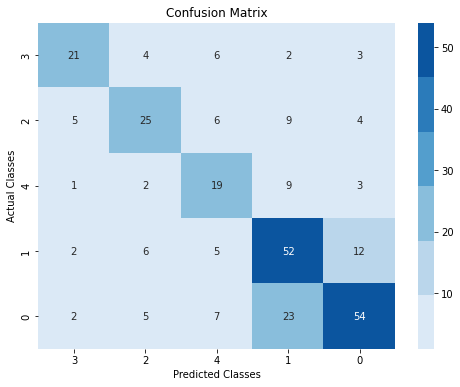

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(confusion_matrix(ground_truth, result_classes), annot = True, cmap=colormap, fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
ax.set(xlabel='Predicted Classes', ylabel='Actual Classes')
ax.figure.savefig('confusion_matrix.png')